In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import classification_report

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    try:
        with open(name + '.pkl', 'rb') as f:
            return pickle.load(f)    
    except FileNotFoundError as e:
        return False;


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


.

.

**TESTING NEURAL NETWORK**

.

.


.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SIAP/data/prepared/final_vectors_with_buckets.csv')
data.head()

In [ ]:
data['IS_SELECTED_DEATH_REASON'] = data['REASONDESCRIPTION'] == 'Myocardial Infarction'
data.head()


In [ ]:
y = data['IS_SELECTED_DEATH_REASON'].to_numpy()
y = 1*y  

X = data[data.columns.difference(['PATIENT', 'IS_SELECTED_DEATH_REASON', 'REASONDESCRIPTION'])].to_numpy()

# del data['IS_SELECTED_DEATH_REASON']
# del data['PATIENT']

In [ ]:
print(  len(np.where( y == 1)[0])  )

1575


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
features_nomalizovane = scaler.transform(X)
X = features_nomalizovane


In [ ]:
# split the dataset 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
print(y.shape)
print(X.shape)

(20999,)
(20999, 1424)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf

# Notes:
# BatchNormalization recall from 0.5 to 0.8
# tf.keras.losses.CategoricalCrossentropy(from_logits=True) 0.95 recall, loss 0 at start...

def build_model(input_dimension):
    model = Sequential()
    model.add(Dense(1024, input_shape=(input_dimension,)))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    # Compile the model
    # model.compile(loss=tf.keras.losses.BinaryCrossentropy() , metrics=['accuracy'], optimizer='adam')

    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True) , metrics=['accuracy'], optimizer='adam') metrics=[tf.keras.metrics.BinaryAccuracy()]
    return model

nn_model = build_model(X_train.shape[1])
nn_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 1024)              1459200   
_________________________________________________________________
batch_normalization_51 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_72 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               131200    
_________________________________________________________________
batch_normalization_52 (Batc (None, 128)               512       
_________________________________________________________________
activation_73 (Activation)   (None, 128)             

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 20
num_batch_size = 64
# nn_model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

nn_model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.2, verbose=1)


Epoch 1/20
210/210 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9522 - val_loss: 0.0000e+00 - val_accuracy: 0.9563
Epoch 2/20
210/210 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9519 - val_loss: 0.0000e+00 - val_accuracy: 0.9560
Epoch 3/20
210/210 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9527 - val_loss: 0.0000e+00 - val_accuracy: 0.9557
Epoch 4/20
210/210 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9537 - val_loss: 0.0000e+00 - val_accuracy: 0.9557
Epoch 5/20
210/210 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9483 - val_loss: 0.0000e+00 - val_accuracy: 0.9557
Epoch 6/20
210/210 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9497 - val_loss: 0.0000e+00 - val_accuracy: 0.9557
Epoch 7/20
210/210 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9

In [ ]:
# Evaluating the model on the training and testing set
score = nn_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = nn_model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 97.29%
Testing Accuracy: 95.55%


In [ ]:
import random
random_index = random.randint(0, X_test.shape[0] - 1)
# random_index = 11

print("INDEX: ", random_index)
temp = np.asarray(X_test[random_index])
print("SHAPE", temp.shape)

predict = nn_model.predict(temp.reshape(1, -1))
t = predict > 0.5
print("predict", predict)
print("PREDICTED", t)
print("Y_TEST", y_test[random_index])

INDEX:  3088
SHAPE (1424,)
predict [[0.]]
PREDICTED [[False]]
Y_TEST 0


In [ ]:
print(np.where(y_test == 1))

(array([  11,   13,   27,   43,   44,   51,   74,  116,  139,  163,  164,
        193,  195,  208,  220,  222,  242,  262,  266,  276,  303,  305,
        323,  328,  339,  351,  354,  356,  372,  379,  386,  398,  406,
        420,  462,  468,  471,  483,  506,  524,  537,  550,  553,  563,
        565,  593,  594,  612,  625,  635,  694,  712,  746,  753,  754,
        775,  776,  787,  794,  819,  828,  830,  851,  852,  868,  884,
        887,  895,  912,  931,  949,  954,  967,  968,  983,  987, 1004,
       1009, 1011, 1027, 1028, 1036, 1045, 1070, 1074, 1094, 1095, 1117,
       1120, 1126, 1140, 1142, 1146, 1150, 1172, 1176, 1236, 1241, 1247,
       1259, 1271, 1295, 1330, 1352, 1375, 1376, 1381, 1388, 1390, 1393,
       1397, 1423, 1449, 1459, 1471, 1473, 1526, 1538, 1548, 1549, 1554,
       1555, 1585, 1589, 1591, 1609, 1630, 1653, 1659, 1669, 1682, 1690,
       1691, 1707, 1726, 1732, 1734, 1737, 1747, 1766, 1772, 1785, 1789,
       1798, 1834, 1902, 1931, 1936, 1939, 1955, 1

In [ ]:
from sklearn.metrics import classification_report
y_pred = nn_model.predict(X_test, batch_size=64, verbose=1)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred, zero_division=0))


66/66 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3887
           1       0.61      0.94      0.74       313

    accuracy                           0.95      4200
   macro avg       0.80      0.95      0.86      4200
weighted avg       0.97      0.95      0.96      4200



In [ ]:
nn_model.save('/content/drive/MyDrive/SIAP/models/nn-miocardial-big.h5')


In [ ]:
from sklearn import svm

clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)
svm_predictions = clf_svm.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3887
           1       0.00      0.00      0.00       313

    accuracy                           0.93      4200
   macro avg       0.46      0.50      0.48      4200
weighted avg       0.86      0.93      0.89      4200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import tree

dtree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 5, min_samples_leaf = 5, max_depth= 5)
dtree_clf = dtree_clf.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test, dtree_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3887
           1       0.69      0.89      0.78       313

    accuracy                           0.96      4200
   macro avg       0.84      0.93      0.88      4200
weighted avg       0.97      0.96      0.96      4200



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

tree_para = {'criterion':['gini','entropy'],'max_depth': range(1,10),  'min_samples_leaf': range(1,5), 'min_samples_split': range(1,10)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_para, cv=5, verbose=2)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.2s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test par

[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.5s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.5s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.5s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=1 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.5s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.5s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.5s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.5s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.6s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.9s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, total=   1.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   1.8s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   1.6s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   1.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, total=   1.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, total=   1.7s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   1.9s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, total=   2.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   1.9s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   1.9s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   1.8s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   1.9s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, total=   1.9s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   1.9s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   1.9s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   1.9s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3, total=   1.9s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3, total=   2.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   2.3s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   2.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3, total=   2.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   2.4s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   2.4s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   2.6s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   2.5s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   2.5s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   2.5s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   2.5s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   2.4s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   2.5s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   2.4s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   2.5s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, total=   2.5s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   2.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   2.4s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   2.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   2.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, total=   2.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   2.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   2.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   2.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   2.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   2.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, total=   2.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  crit

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=3, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=2, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, total=   0.4s
[CV] criterion=entropy, max_depth=1, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.8s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, total=   0.7s
[CV] criterion=entropy, max_depth=2, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, total=   0.9s
[CV] criterion=entropy, max_depth=3, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, total=   1.1s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, total=   1.1s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, total=   1.1s
[CV] criterion=entropy, max_depth=4, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.3s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.3s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.3s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, total=   1.3s
[CV] criterion=entropy, max_depth=5, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, total=   1.4s
[CV] criterion=entropy, max_depth=6, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, total=   1.7s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=3, total=   1.4s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   1.5s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3, total=   1.6s
[CV] criterion=entropy, max_depth=7, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=3, total=   1.7s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, total=   1.6s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, total=   1.6s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, total=   1.7s
[CV] criterion=entropy, max_depth=8, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, total=   1.8s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   1.9s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, total=   1.6s
[CV] criterion=entropy, max_depth=9, min_samples_lea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   1.8s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, total=   1.7s
[CV] criterion=entropy, max_depth=9, min_samples_lea

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed: 68.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
clf.best_score_

0.9650575036504628

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3887
           1       0.69      0.90      0.78       313

    accuracy                           0.96      4200
   macro avg       0.84      0.93      0.88      4200
weighted avg       0.97      0.96      0.96      4200



[Text(167.4, 195.696, 'Chronic low back pain (finding)_CO <= 0.002\ngini = 0.139\nsamples = 16799\nvalue = [15537, 1262]'),
 Text(111.60000000000001, 152.208, 'gini = 0.016\nsamples = 15085\nvalue = [14965, 120]'),
 Text(223.20000000000002, 152.208, 'Chronic low back pain (finding)_CO <= 0.106\ngini = 0.445\nsamples = 1714\nvalue = [572, 1142]'),
 Text(167.4, 108.72, 'o_Protein [Mass/volume] in Serum or Plasma_2 <= 0.5\ngini = 0.421\nsamples = 1615\nvalue = [487, 1128]'),
 Text(111.60000000000001, 65.232, 'Physical examination following birth <= 0.75\ngini = 0.394\nsamples = 1492\nvalue = [403, 1089]'),
 Text(55.800000000000004, 21.744, 'gini = 0.386\nsamples = 1472\nvalue = [385, 1087]'),
 Text(167.4, 21.744, 'gini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(223.20000000000002, 65.232, 'gini = 0.433\nsamples = 123\nvalue = [84, 39]'),
 Text(279.0, 108.72, 'gini = 0.243\nsamples = 99\nvalue = [85, 14]')]

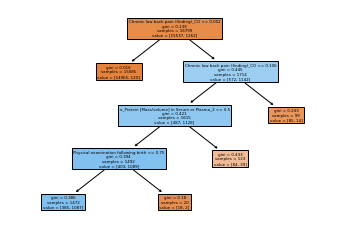

In [ ]:
tree.plot_tree(dtree_clf,
           feature_names = data.columns,
           filled = True)

In [ ]:
## XGBoost

import xgboost as xgb
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)


In [ ]:
params = {
    'max_depth':10,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    # 'objective':'multi:softmax',
    'objective':'multi:softprob',
    'num_class': 2,
    'eval_metric' : 'merror'
}

In [ ]:
model = xgb.train(
    params,
    dtrain,
    #evals=[(dtest, "Test")], ovde treba koristiti validacioni skup
    evals=[(dtrain, "Train")],
    early_stopping_rounds=35,
    num_boost_round=999
)

[0]	Train-merror:0.025894
Will train until Train-merror hasn't improved in 35 rounds.
[1]	Train-merror:0.023335
[2]	Train-merror:0.022501
[3]	Train-merror:0.020775
[4]	Train-merror:0.020596
[5]	Train-merror:0.018989
[6]	Train-merror:0.016549
[7]	Train-merror:0.014882
[8]	Train-merror:0.013394
[9]	Train-merror:0.012025
[10]	Train-merror:0.010774
[11]	Train-merror:0.009822
[12]	Train-merror:0.00881
[13]	Train-merror:0.008036
[14]	Train-merror:0.007203
[15]	Train-merror:0.006667
[16]	Train-merror:0.006072
[17]	Train-merror:0.005477
[18]	Train-merror:0.005
[19]	Train-merror:0.00381
[20]	Train-merror:0.002917
[21]	Train-merror:0.002857
[22]	Train-merror:0.002322
[23]	Train-merror:0.001845
[24]	Train-merror:0.00125
[25]	Train-merror:0.001131
[26]	Train-merror:0.001131
[27]	Train-merror:0.000833
[28]	Train-merror:0.000595
[29]	Train-merror:0.000476
[30]	Train-merror:0.000417
[31]	Train-merror:0.000298
[32]	Train-merror:0.000179
[33]	Train-merror:0.000119
[34]	Train-merror:6e-05
[35]	Train-mer

In [ ]:
results = model.predict(dtest)
results = [temp[1] > 0.5 for temp in results]


In [ ]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3887
           1       0.71      0.82      0.76       313

    accuracy                           0.96      4200
   macro avg       0.85      0.90      0.87      4200
weighted avg       0.96      0.96      0.96      4200



In [ ]:
print(model.predict(dtest)[11])

[0.49692422 0.5030758 ]


In [ ]:
save_obj(model, '/content/drive/MyDrive/SIAP/models/xgb-miocardial')

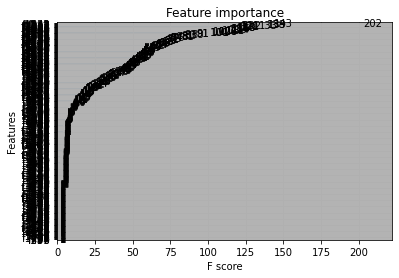

In [ ]:
from xgboost import plot_importance

plot_importance(model)

In [ ]:
# SIMPLE ENCODER DECODER

import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 300  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(X.shape[1],))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(X.shape[1], activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

encoded_imgs = encoder.predict(X_train)


.

.

**ANSAMBLE CREATION**

.

.


.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 20
num_batch_size = 64
# Notes:
# BatchNormalization recall from 0.5 to 0.8
# tf.keras.losses.CategoricalCrossentropy(from_logits=True) 0.95 recall, loss 0 at start...

def build_model(input_dimension):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_dimension,)))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    # Compile the model
    model.compile(loss=tf.keras.losses.BinaryCrossentropy() , metrics=['accuracy'], optimizer='adam')

    # model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True) , metrics=['accuracy'], optimizer='adam')
    return model

nn_model = build_model(X_train.shape[1])
nn_model.summary()

In [ ]:
from sklearn.model_selection import train_test_split 

data = pd.read_csv('/content/drive/MyDrive/SIAP/data/prepared/final_vectors_with_buckets.csv')
train, test = train_test_split(data, test_size=0.2, random_state = 42)

In [ ]:

death_reasons = ['Cardiac Arrest', 'Chronic congestive heart failure (disorder)',\
                 'Chronic obstructive bronchitis (disorder)', 'Malignant neoplasm of breast (disorder)',\
                 'Malignant tumor of colon', 'Myocardial Infarction', 'Non-small cell lung cancer (disorder)', 'Pulmonary emphysema (disorder)', 'Stroke']

for index, reason in enumerate(death_reasons):
  train['IS_SELECTED_DEATH_REASON'] = train['REASONDESCRIPTION'] == reason

  y = train['IS_SELECTED_DEATH_REASON'].to_numpy() * 1
  X = train[train.columns.difference(['PATIENT', 'IS_SELECTED_DEATH_REASON', 'REASONDESCRIPTION'])].to_numpy()

  print("-"*80)
  print(reason + " " + str(len(np.nonzero(y)[0])))

  nn_model = build_model(X.shape[1])
  nn_model.fit(X, y, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.1, verbose=1)
  nn_model.save('/content/drive/MyDrive/SIAP/models/ansamble/' + str(index) + '.h5')
  print("-"*80)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


--------------------------------------------------------------------------------
Cardiac Arrest 315
Epoch 1/20
237/237 [==============================] - 2s 6ms/step - loss: 0.3963 - accuracy: 0.8351 - val_loss: 0.0873 - val_accuracy: 0.9780
Epoch 2/20
237/237 [==============================] - 1s 5ms/step - loss: 0.0773 - accuracy: 0.9776 - val_loss: 0.0838 - val_accuracy: 0.9780
Epoch 3/20
237/237 [==============================] - 1s 5ms/step - loss: 0.0683 - accuracy: 0.9806 - val_loss: 0.0897 - val_accuracy: 0.9780
Epoch 4/20
237/237 [==============================] - 1s 5ms/step - loss: 0.0641 - accuracy: 0.9798 - val_loss: 0.0719 - val_accuracy: 0.9774
Epoch 5/20
237/237 [==============================] - 1s 5ms/step - loss: 0.0608 - accuracy: 0.9803 - val_loss: 0.0844 - val_accuracy: 0.9780
Epoch 6/20
237/237 [==============================] - 1s 5ms/step - loss: 0.0641 - accuracy: 0.9807 - val_loss: 0.0881 - val_accuracy: 0.9780
Epoch 7/20
237/237 [============================

In [ ]:
for index, reason in enumerate(death_reasons):
  test['IS_SELECTED_DEATH_REASON'] = test['REASONDESCRIPTION'] == reason

  y = test['IS_SELECTED_DEATH_REASON'].to_numpy() * 1
  X = test[test.columns.difference(['PATIENT', 'IS_SELECTED_DEATH_REASON', 'REASONDESCRIPTION'])].to_numpy()

  print("-"*80)
  print(reason + " " + str(len(np.nonzero(y)[0])))

  nn_model = tf.keras.models.load_model('/content/drive/MyDrive/SIAP/models/ansamble/' + str(index) + '.h5', compile=True)
  y_pred = nn_model.predict(X, batch_size=64, verbose=1)
  y_pred = (y_pred > 0.5)
  print(classification_report(y, y_pred, zero_division=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


--------------------------------------------------------------------------------
Cardiac Arrest 96
66/66 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4104
           1       0.17      0.05      0.08        96

    accuracy                           0.97      4200
   macro avg       0.58      0.52      0.53      4200
weighted avg       0.96      0.97      0.97      4200

--------------------------------------------------------------------------------
Chronic congestive heart failure (disorder) 174
66/66 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4026
           1       0.98      0.97      0.97       174

    accuracy                           1.00      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       1.00      1.00      1.00      4200

------------

.

.

**MULTILABEL CLASSIFICATOR**

.

.


.


In [ ]:


data = pd.read_csv('/content/drive/MyDrive/SIAP/data/prepared/final_vectors_with_buckets.csv')
data.head()

data['IS_SELECTED_DEATH_REASON'] = data['REASONDESCRIPTION'] == 'Myocardial Infarction'
data.head()

y = data['IS_SELECTED_DEATH_REASON'].to_numpy()
y = 1*y  

X = data[data.columns.difference(['PATIENT', 'IS_SELECTED_DEATH_REASON', 'REASONDESCRIPTION'])].to_numpy()

# split the dataset 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 


In [20]:
# TESTING WITHOUT OBSERVATIONS - to compare to autoencoder method
encounters = pd.read_csv('/content/drive/MyDrive/SIAP/data/encounters.csv')
patients = pd.read_csv('/content/drive/MyDrive/SIAP/data/patients.csv')

encounters = encounters[~encounters['REASONDESCRIPTION'].isin(['Bullet wound', 'Drug overdose', 'Suicide - firearms', 'Suicide - suffocation'])]
patients_death = patients[['Id', 'DEATHDATE']]

data = pd.read_csv('/content/drive/MyDrive/SIAP/data/prepared/without_observations.csv')
data = data.groupby(data['PATIENT']).aggregate('sum')
data = data.reset_index()
death_encounters = encounters[encounters['DESCRIPTION'] == 'Death Certification']
death_encounters.head()
patients_death_reason = death_encounters.join(patients_death.set_index('Id'), on='PATIENT', how='right', lsuffix="_L")
patients_death_reason = patients_death_reason[['PATIENT', 'REASONDESCRIPTION']]
data = data.join(patients_death_reason.set_index('PATIENT'), on='PATIENT', how='left')

In [21]:
data = pd.read_csv('/content/drive/MyDrive/SIAP/data/prepared/final_vectors_with_buckets.csv')
data = data.dropna(subset=['REASONDESCRIPTION'])
reasons = data['REASONDESCRIPTION'].unique()
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(reasons.reshape(len(reasons), 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [22]:
X = data[data.columns.difference(['PATIENT', 'IS_SELECTED_DEATH_REASON', 'REASONDESCRIPTION'])].to_numpy()
y = onehot_encoder.transform(data['REASONDESCRIPTION'].to_numpy().reshape(-1, 1)).toarray()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
# from keras.utils import to_categorical
import tensorflow as tf
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 20
num_batch_size = 64
# Notes:
# BatchNormalization recall from 0.5 to 0.8
# tf.keras.losses.CategoricalCrossentropy(from_logits=True) 0.95 recall, loss 0 at start...

def build_multilabel_model(input_dimension, output_dimensions):
    model = Sequential()
    model.add(Dense(1024, input_shape=(input_dimension,)))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('selu'))
    model.add(Dropout(0.2))
    model.add(Dense(output_dimensions))
    model.add(Activation('sigmoid'))
    # Compile the model
    model.compile(loss=tf.keras.losses.BinaryCrossentropy() , metrics=['accuracy'], optimizer='adam')

    # model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True) , metrics=['accuracy'], optimizer='adam')
    return model

nn_model = build_multilabel_model(X_train.shape[1], y.shape[1])
# nn_model.summary()

In [24]:
nn_model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.2, verbose=1)

Epoch 1/20
192/192 [==============================] - 3s 8ms/step - loss: 0.6016 - accuracy: 0.3568 - val_loss: 0.1473 - val_accuracy: 0.5896
Epoch 2/20
192/192 [==============================] - 1s 4ms/step - loss: 0.1094 - accuracy: 0.5976 - val_loss: 0.0750 - val_accuracy: 0.6157
Epoch 3/20
192/192 [==============================] - 1s 4ms/step - loss: 0.0741 - accuracy: 0.6302 - val_loss: 0.0647 - val_accuracy: 0.6301
Epoch 4/20
192/192 [==============================] - 1s 4ms/step - loss: 0.0674 - accuracy: 0.6357 - val_loss: 0.0619 - val_accuracy: 0.6392
Epoch 5/20
192/192 [==============================] - 1s 4ms/step - loss: 0.0634 - accuracy: 0.6530 - val_loss: 0.0612 - val_accuracy: 0.6395
Epoch 6/20
192/192 [==============================] - 1s 5ms/step - loss: 0.0621 - accuracy: 0.6565 - val_loss: 0.0607 - val_accuracy: 0.6447
Epoch 7/20
192/192 [==============================] - 1s 4ms/step - loss: 0.0605 - accuracy: 0.6633 - val_loss: 0.0609 - val_accuracy: 0.6470
Epoch 

In [25]:
from sklearn.metrics import classification_report
y_pred = nn_model.predict(X_test, batch_size=64, verbose=1)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred, zero_division=0, target_names=[reason.split("x0_")[1] for reason in onehot_encoder.get_feature_names()]))


60/60 [==============================] - 0s 1ms/step
                                                          precision    recall  f1-score   support

                          Alzheimer's disease (disorder)       0.50      0.50      0.50         6
                    Burn injury(morphologic abnormality)       0.00      0.00      0.00        33
                                                COVID-19       0.52      0.33      0.40       402
                                          Cardiac Arrest       0.00      0.00      0.00        86
             Chronic congestive heart failure (disorder)       0.94      0.67      0.78       175
               Chronic obstructive bronchitis (disorder)       0.80      0.70      0.74        56
                              Concussion injury of brain       0.00      0.00      0.00        95
                  Death due to acute respiratory failure       1.00      0.50      0.67         6
                                     Death due to sepsis       0

In [ ]:
print(onehot_encoder.get_feature_names())

["x0_Alzheimer's disease (disorder)"
 'x0_Burn injury(morphologic abnormality)' 'x0_COVID-19'
 'x0_Cardiac Arrest' 'x0_Chronic congestive heart failure (disorder)'
 'x0_Chronic obstructive bronchitis (disorder)'
 'x0_Concussion injury of brain'
 'x0_Death due to acute respiratory failure' 'x0_Death due to sepsis'
 'x0_End stage renal disease (disorder)'
 "x0_Familial Alzheimer's disease of early onset (disorder)"
 'x0_Fracture of the vertebral column with spinal cord injury'
 'x0_Malignant neoplasm of breast (disorder)'
 'x0_Malignant tumor of colon' 'x0_Meningomyelocele (disorder)'
 'x0_Myocardial Infarction' 'x0_Natural death with unknown cause'
 'x0_Neoplasm of prostate' 'x0_Non-small cell lung cancer (disorder)'
 'x0_Overlapping malignant neoplasm of colon' 'x0_Pneumonia'
 'x0_Postoperative complication' 'x0_Primary malignant neoplasm of colon'
 'x0_Pulmonary emphysema (disorder)'
 'x0_Secondary malignant neoplasm of colon' 'x0_Sepsis of Pseudomonas'
 'x0_Small cell carcinoma of lu

In [ ]:
testiing = [np.where(arr == 1)[0][0] for arr in y_train]

In [ ]:
print(y.shape[1])

29


In [ ]:
## XGBoost

xgb_y_train =  [np.where(arr == 1)[0][0] for arr in y_train]
xgb_y_test =  [np.where(arr == 1)[0][0] for arr in y_test]


import xgboost as xgb
dtrain = xgb.DMatrix(X_train, xgb_y_train)
dtest = xgb.DMatrix(X_test, xgb_y_test)

params = {
    'max_depth':10,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'objective':'multi:softmax',
    # 'objective':'multi:softprob',
    'num_class': y.shape[1],
    'eval_metric' : 'merror'
}

model = xgb.train(
    params,
    dtrain,
    #evals=[(dtest, "Test")], ovde treba koristiti validacioni skup
    evals=[(dtrain, "Train")],
    early_stopping_rounds=35,
    num_boost_round=999
)

[0]	Train-merror:0.173924
Will train until Train-merror hasn't improved in 35 rounds.
[1]	Train-merror:0.160952
[2]	Train-merror:0.146349
[3]	Train-merror:0.133507
[4]	Train-merror:0.121578
[5]	Train-merror:0.111343
[6]	Train-merror:0.103129
[7]	Train-merror:0.09498
[8]	Train-merror:0.088136
[9]	Train-merror:0.079465
[10]	Train-merror:0.071904
[11]	Train-merror:0.06558
[12]	Train-merror:0.058605
[13]	Train-merror:0.052803
[14]	Train-merror:0.046089
[15]	Train-merror:0.04146
[16]	Train-merror:0.037223
[17]	Train-merror:0.032073
[18]	Train-merror:0.027836
[19]	Train-merror:0.02399
[20]	Train-merror:0.020209
[21]	Train-merror:0.017145
[22]	Train-merror:0.015124
[23]	Train-merror:0.012516
[24]	Train-merror:0.01043
[25]	Train-merror:0.008866
[26]	Train-merror:0.007432
[27]	Train-merror:0.006128
[28]	Train-merror:0.004824
[29]	Train-merror:0.004302
[30]	Train-merror:0.003846
[31]	Train-merror:0.00339
[32]	Train-merror:0.002868
[33]	Train-merror:0.002542
[34]	Train-merror:0.002477
[35]	Train-

In [ ]:
results = model.predict(dtest)
print(results)
print(classification_report(xgb_y_test, results, zero_division=0, target_names=[reason.split("x0_")[1] for ind, reason in enumerate(onehot_encoder.get_feature_names()) if ind not in [8, 9]    ]))

[16. 28. 28. ... 16. 15. 16.]
                                                          precision    recall  f1-score   support

                          Alzheimer's disease (disorder)       0.00      0.00      0.00         6
                    Burn injury(morphologic abnormality)       0.00      0.00      0.00        33
                                                COVID-19       0.82      0.84      0.83       402
                                          Cardiac Arrest       0.29      0.05      0.08        86
             Chronic congestive heart failure (disorder)       0.95      0.99      0.97       175
               Chronic obstructive bronchitis (disorder)       0.85      0.82      0.84        56
                              Concussion injury of brain       0.20      0.03      0.05        95
                  Death due to acute respiratory failure       1.00      0.67      0.80         6
  Familial Alzheimer's disease of early onset (disorder)       0.44      0.44      0.44